<a href="https://colab.research.google.com/github/damianChoi/PSAD/blob/master/ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.1 Objectives

# 2.2 What is Algorithm Analysis?

In [0]:
def sumOfN(n):
  theSum = 0
  for i in range(1, n+1):
    theSum += i
  
  return theSum

print(sumOfN(10))

55


In [0]:
def foo(tom):
  fred = 0
  for bill in range(1,tom+1):
    barney = bill
    fred = fred + barney

  return fred

print(foo(10))

55


In [0]:
import time

def sumOfN2(n):
  start = time.time()
  
  theSum = 0
  for i in range(1, n+1):
    theSum += i
    
  end = time.time()
  
  return theSum, end-start

In [0]:
for _ in range(5):
  print("Sum is %d required %10.7f seconds" % sumOfN2(10000))

Sum is 50005000 required  0.0008109 seconds
Sum is 50005000 required  0.0011964 seconds
Sum is 50005000 required  0.0010586 seconds
Sum is 50005000 required  0.0016963 seconds
Sum is 50005000 required  0.0010149 seconds


In [0]:
for _ in range(5):
  print("Sum is %d required %10.7f seconds" % sumOfN2(100000))

Sum is 5000050000 required  0.0122616 seconds
Sum is 5000050000 required  0.0095034 seconds
Sum is 5000050000 required  0.0082781 seconds
Sum is 5000050000 required  0.0071888 seconds
Sum is 5000050000 required  0.0076673 seconds


In [0]:
for _ in range(5):
  print("Sum is %d required %10.7f seconds" % sumOfN2(1000000))

Sum is 500000500000 required  0.0829170 seconds
Sum is 500000500000 required  0.0722156 seconds
Sum is 500000500000 required  0.0750647 seconds
Sum is 500000500000 required  0.0757997 seconds
Sum is 500000500000 required  0.0767841 seconds


In [0]:
def sumOfN3(n):
  start = time.time()
  theSum = n*(n+1)/2
  end = time.time()
  return theSum, end-start

In [0]:
for i in range(5):
  print("Sum is %d required %10.7f seconds" % sumOfN3(10**(i+4)))

Sum is 50005000 required  0.0000012 seconds
Sum is 5000050000 required  0.0000005 seconds
Sum is 500000500000 required  0.0000005 seconds
Sum is 50000005000000 required  0.0000002 seconds
Sum is 5000000050000000 required  0.0000010 seconds


# 2.3 Big-O Notation

In [0]:
def findMin(list):
  overallMin = list[0]
  for i in list:
    isSmallest = True
    for j in list:
      if i > j:
        isSmallest = False
    if isSmallest:
      overallMin = i
      
  return overallMin

In [0]:
findMin([4, 2, 1, 3])

1

In [0]:
from random import randrange
for listSize in range(1000, 10001, 1000):
  alist = [randrange(100000) for x in range(listSize)]
  start = time.time()
  findMin(alist)
  end = time.time()
  print("size: %d, time: %f" % (listSize, end-start))

size: 1000, time: 0.065935
size: 2000, time: 0.244398
size: 3000, time: 0.538254
size: 4000, time: 0.965396
size: 5000, time: 1.483059
size: 6000, time: 2.127683
size: 7000, time: 2.906996
size: 8000, time: 3.876258
size: 9000, time: 4.902811
size: 10000, time: 6.045754


In [0]:
def findMin(list, i=0):
  minSoFar = list[i]
  for j in range(i, len(list)):
    if minSoFar > list[j]:
      return findMin(list, i=j)
    
  return minSoFar

In [0]:
findMin([4, 2, 1, 3])

1

In [0]:
from random import randrange
for listSize in range(1000, 10001, 1000):
  alist = [randrange(100000) for x in range(listSize)]
  start = time.time()
  findMin(alist)
  end = time.time()
  print("size: %d, time: %f" % (listSize, end-start))

size: 1000, time: 0.000080
size: 2000, time: 0.000206
size: 3000, time: 0.000225
size: 4000, time: 0.000295
size: 5000, time: 0.000400
size: 6000, time: 0.000421
size: 7000, time: 0.000627
size: 8000, time: 0.000576
size: 9000, time: 0.000873
size: 10000, time: 0.000710


In [0]:
def fineMin(list):
  minSoFar = list[0]
  for i in list:
    if i < minSoFar:
      minSoFar = i
  
  return minSoFar

**When comparing the subitems in a collection variable, it is helpful to make a seperate variable for comparison. You can decrease the number of nesting loops**

In [0]:
"*".join(["cat", "dog", "rabbit"])

'cat*dog*rabbit'

In [0]:
str.join?

# 2.4 An Anagram Detection Example

assumption: the two strings in question are of equal length and that they are made up of symbols from the set of 26 lowercase alphabetic characters. 

### 2.4.1 Solution 1: Checking Off

In [10]:
def anagramSolution1(string1: str, string2: str) -> bool:

  if not (len(string1) == len(string2)):
    return False
  
  maxIndex = len(string1) - 1
  listForCheckOff = list(string2)
  stillOK = True
  index1 = 0
  
  while index1 <= maxIndex and stillOK:
    index2 = 0
    found = False
    while index2 <= maxIndex and not found:
      if string1[index1] == listForCheckOff[index2]:
        found = True
      else:
        index2 += 1
    if found:
      listForCheckOff[index2] = None
      index1 += 1
    else:
      stillOK = False
      
  return stillOK

print(anagramSolution1('abcde','edcba'))

True


$O(N^2)$

### 2.4.2 solution 2: Sort and Compare

In [2]:
def anagramSolution2(s1,s2):
    alist1 = list(s1)
    alist2 = list(s2)

    alist1.sort()
    alist2.sort()

    pos = 0
    matches = True

    while pos < len(s1) and matches:
        if alist1[pos]==alist2[pos]:
            pos = pos + 1
        else:
            matches = False

    return matches

print(anagramSolution2('abcde','edcba'))

True


sorting method ~ $O(n^2)$ or $O(nlogn)$

### 2.4.3 Solution 3: Brute Force

$O(n!)$

### 2.4.4 Solution 4: Count and Compare

In [0]:
def anagramSolution4(string1, string2):
  countList1 = [0] * 26
  countList2 = [0] * 26
  
  for i in range(len(string1)):
    positionNumber = ord(string1[i]) - ord('a')
    countList1[positionNumber] += 1
    
  for i in range(len(string2)):
    positionNumber = ord(string2[i]) - ord('a')
    countList2[positionNumber] += 1
    
  j = 0
  stillOK = True
  while j < 26 and stillOK:
    if not countList1[j] == countList2[j]:
      stillOK = False
    
    j += 1
    
  return stillOK

In [16]:
print(anagramSolution4('apple','pleap'))

True


## 2.5 Performance of Data Type Structures

## 2.6 Lists

Two common operations are indexing and assigning to an index position. Both of these operations take the same amount of time no matter how large the list becomes. When an operation like this is independent of the size of the list they are O(1).

Another very common programming task is to grow a list. There are two ways to create a longer list. You can use the append method or the concatenation operator. The append method is O(1). However, the concatenation operator is O(k) where k is the size of the list that is being concatenated. This is important for you to know because it can help you make your own programs more efficient by choosing the right tool for the job.

In [0]:
def test1():
    l = []
    for i in range(1000):
        l = l + [i]

def test2():
    l = []
    for i in range(1000):
        l.append(i)

def test3():
    l = [i for i in range(1000)]

def test4():
    l = list(range(1000))

In [25]:
from timeit import Timer
t1 = Timer("test1()", "from __main__ import test1")
print("concat ",t1.timeit(number=1000), "milliseconds")
t2 = Timer("test2()", "from __main__ import test2")
print("append ",t2.timeit(number=1000), "milliseconds")
t3 = Timer("test3()", "from __main__ import test3")
print("comprehension ",t3.timeit(number=1000), "milliseconds")
t4 = Timer("test4()", "from __main__ import test4")
print("list range ",t4.timeit(number=1000), "milliseconds")

concat  3.3858600749999823 milliseconds
append  0.1258696449999661 milliseconds
comprehension  0.052948732000004384 milliseconds
list range  0.0202164540000922 milliseconds


In [0]:
popzero = Timer("x.pop(0)",
                       "from __main__ import x")
popend = Timer("x.pop()",
                      "from __main__ import x")

In [28]:
print("pop(0)   pop()")
for i in range(1000000,100000001,1000000):
    x = list(range(i))
    pt = popend.timeit(number=1000)
    x = list(range(i))
    pz = popzero.timeit(number=1000)
    print("%15.5f, %15.5f" %(pz,pt))

pop(0)   pop()
        0.41885,         0.00010
        0.88211,         0.00011
        1.78873,         0.00011
        3.14710,         0.00020
        3.79175,         0.00011
        4.30841,         0.00011
        5.66254,         0.00010
        6.97216,         0.00011
        6.49183,         0.00013
        7.77293,         0.00011
        9.80659,         0.00020
        9.10453,         0.00012
        9.96907,         0.00011
       11.95108,         0.00011
       11.43230,         0.00012
       12.22984,         0.00023
       14.65156,         0.00010
       15.78873,         0.00013
       16.25215,         0.00013
       17.09174,         0.00011
       17.64155,         0.00011
       18.42052,         0.00012
       20.07636,         0.00012
       20.29694,         0.00012
       21.22121,         0.00012
       22.05562,         0.00012
       22.97285,         0.00014
       24.04572,         0.00012
       24.25102,         0.00012
       25.70186,         0.0

KeyboardInterrupt: ignored

## 2.7 Dictionaries

In [0]:
def timingContainsOperatorInList(i):
  import random, time
  alist = list(range(i))
  random.randrange(i) in alist

In [0]:
def timingContainsOperatorInDictionary(i):
  import random, time
  adictionary = {j:None for j in range(i)}
  random.randrange(i) in adictionary

In [21]:
# this experiment is not suitable for the purpose because the functions include the process of initiating a list and a dictionary
from timeit import Timer
listTimer = Timer("timingContainsOperatorInList(i)", "from __main__ import timingContainsOperatorInList, i")
dictionaryTimer = Timer("timingContainsOperatorInDictionary(i)", "from __main__ import timingContainsOperatorInDictionary, i")
print("List     Dictionary")
for i in range(10000, 1000001, 10000):
  lt = listTimer.timeit(number=1000)
  dt = dictionaryTimer.timeit(number=1000)
  print("%7.5f %7.5f" %(lt, dt))

List     Dictionary
0.27228 0.87958
0.65668 1.78705
1.10135 2.92121
1.52450 3.78362


KeyboardInterrupt: ignored

In [30]:
import random
from timeit import Timer
ltList = []
dtList = []

for i in range(100, 10001, 100):
  alist = list(range(i))
  listTimer = Timer("random.randrange(i) in alist", "from __main__ import random, i, alist")
  lt = listTimer.timeit(number=1000)
  adictionary = {j: None for j in range(i)}
  dictionaryTimer = Timer("random.randrange(i) in adictionary", "from __main__ import random, i, adictionary")
  dt = dictionaryTimer.timeit(number=1000)
  ltList.append(lt)
  dtList.append(dt)
  if i % 1000 == 0:
    print("i = %d" %i)

i = 1000
i = 2000
i = 3000
i = 4000
i = 5000
i = 6000
i = 7000
i = 8000
i = 9000
i = 10000


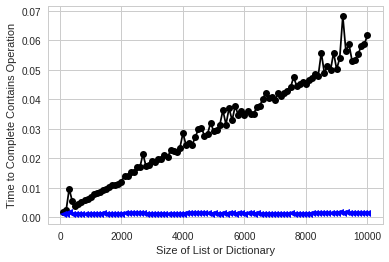

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

x = np.array(range(100, 10001, 100))
y1 = np.array(ltList)
y2 = np.array(dtList)
plt.plot(x, y1, '-ok')
plt.plot(x, y2, '-<b')
plt.xlabel("Size of List or Dictionary")
plt.ylabel("Time to Complete Contains Operation");

In [0]:
## 2.11 Programming Exercizes

In [0]:
print("i     lt     dt")
for i in range(10000, 1000001, 1000):
  alist = list(range(i))
  listTimer = Timer("alist[random.randrange(i)]", "from __main__ import random, i, alist")
  lt = listTimer.timeit(number=1000)
  adictionary = {j: None for j in range(i)}
  dictionaryTimer = Timer("adictionary(random.randrange(i))", "from __main__ import random, i, adictionary")
  dt = dictionaryTimer.timeit(number=1000)
  print("%d %7.5f %7.5f" %(i, lt, df))

alist.sort()

alist[k-1]

In [0]:
def fineMin(alist):
  minSoFar = list[0]
  for i in list:
    if i < minSoFar:
      minSoFar = i
  
  return minSoFar